In [2]:
#Import File
import pandas as pd
file_path = r'C:\Users\flori\Downloads\marketing_customer_analysis_clean.csv'

df_marketing = pd.read_csv(file_path)

In [3]:
# Create Categorical and Numbercial DF

categorical_df = df_marketing.select_dtypes(include='object')
numericals_df = df_marketing.select_dtypes(include ='number')

In [4]:
# Create nominal df
nominals_df = pd.get_dummies(categorical_df[['state', 'response', 'employmentstatus', 'gender', 'location_code','marital_status', 'policy_type','policy', 'renew_offer_type','sales_channel','vehicle_class', 'vehicle_type']], dtype=int)

In [5]:
# Create ordinal df
ordinals_df = pd.DataFrame(columns=["coverage", "education", "vehicle_size"])

# Transform the columns in ordinals_df
ordinals_df["coverage"] = df_marketing["coverage"].map({'Basic': 0, 'Extended': 1, 'Premium': 2})
ordinals_df["education"] = df_marketing["education"].map({'High School or Below':0, 'College': 1, 'Bachelor':2, 'Master':3, 'Doctor':4})
ordinals_df["vehicle_size"] = df_marketing["vehicle_size"].map({'Small': 0, 'Medsize': 1, 'Large': 2})

### Concat final DF

In [6]:
final_df = pd.concat([ordinals_df,numericals_df,nominals_df], axis=1)

In [7]:
final_df

,coverage,education,vehicle_size,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,0,1,1,0,4809.216960,48029,61,7.000000,52,0.000000,...,0,0,0,1,0,0,0,0,0,1
1,0,1,1,1,2228.525238,0,64,3.000000,26,0.000000,...,0,1,0,1,0,0,0,0,0,1
2,0,2,1,2,14947.917300,22139,100,34.000000,31,0.000000,...,0,1,0,0,0,0,1,0,0,1
3,1,1,1,3,22332.439460,49078,97,10.000000,3,0.000000,...,1,0,0,1,0,0,0,0,0,1
4,2,2,1,4,9025.067525,23675,117,15.149071,31,0.384256,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2,2,1,10905,15563.369440,0,253,15.149071,40,0.384256,...,0,0,1,0,1,0,0,0,0,1
10906,0,1,1,10906,5259.444853,61146,65,7.000000,68,0.000000,...,1,0,0,1,0,0,0,0,0,1
10907,1,2,1,10907,23893.304100,39837,201,11.000000,63,0.000000,...,0,0,1,0,0,1,0,0,0,1
10908,2,1,1,10908,11971.977650,64195,158,0.000000,27,4.000000,...,1,0,0,0,0,0,1,0,0,1


### X-Y Split

In [8]:
# Drop Null Values and Duplicates
df_marketing.dropna()
df_marketing = df_marketing.drop_duplicates()

In [9]:
final_df.columns

Index(['coverage', 'education', 'vehicle_size', 'unnamed:_0',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'state_Arizona', 'state_California', 'state_Nevada',
       'state_Oregon', 'state_Washington', 'response_No', 'response_Yes',
       'employmentstatus_Disabled', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_F', 'gender_M',
       'location_code_Rural', 'location_code_Suburban', 'location_code_Urban',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Corporate Auto',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L1', 'policy_Corporate L2', 'policy_Corporate L3',
       'policy_Personal L1', 'policy_Person

In [10]:
X = final_df[['coverage', 'education', 'vehicle_size',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'month', 'state_Arizona', 'state_California', 'state_Nevada',
       'state_Oregon', 'state_Washington', 'response_No', 'response_Yes',
       'employmentstatus_Disabled', 'employmentstatus_Employed',
       'employmentstatus_Medical Leave', 'employmentstatus_Retired',
       'employmentstatus_Unemployed', 'gender_F', 'gender_M',
       'location_code_Rural', 'location_code_Suburban', 'location_code_Urban',
       'marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'policy_type_Corporate Auto',
       'policy_type_Personal Auto', 'policy_type_Special Auto',
       'policy_Corporate L1', 'policy_Corporate L2', 'policy_Corporate L3',
       'policy_Personal L1', 'policy_Personal L2', 'policy_Personal L3',
       'policy_Special L1', 'policy_Special L2', 'policy_Special L3',
       'renew_offer_type_Offer1', 'renew_offer_type_Offer2',
       'renew_offer_type_Offer3', 'renew_offer_type_Offer4',
       'sales_channel_Agent', 'sales_channel_Branch',
       'sales_channel_Call Center', 'sales_channel_Web',
       'vehicle_class_Four-Door Car', 'vehicle_class_Luxury Car',
       'vehicle_class_Luxury SUV', 'vehicle_class_SUV',
       'vehicle_class_Sports Car', 'vehicle_class_Two-Door Car',
       'vehicle_type_A']]
# We can also just drop one columns instead of listing all columns
y = final_df ["total_claim_amount"]

In [11]:
final_df.dropna(inplace=True)
final_df.drop_duplicates(inplace=True)


### X-Y Split

In [30]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### Standardscaler

In [32]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [33]:
scaler = StandardScaler()
scaler_fitted = scaler.fit(X_train)
X_train_scaled = scaler_fitted.transform(X_train)
X_test_scaled = scaler_fitted.transform(X_test)

<Axes: >

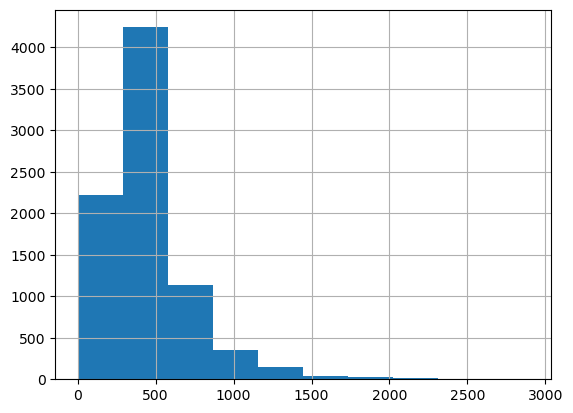

In [34]:
y_train.hist() # check output 

In [35]:
pt = PowerTransformer

In [37]:
y_train = y_train.reset_index(drop=True)  # Resetting the index

In [45]:
import numpy as np

# Assuming y_train is a NumPy array
y_train = y_train.reshape(-1, 1)

# Now you can use the transform method
y_train_transformed = pt.transform(y_train)

In [43]:
from sklearn.preprocessing import PowerTransformer

# Assuming y_train is a NumPy array
pt = PowerTransformer()
y_train_transformed = pt.fit_transform(y_train)

In [46]:
y_test = pt.transform(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[475.423848 350.4      482.4      ...  41.182611 364.8       89.411365].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
# Drop Null values from y-train and X_train 

y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame (X_train)
train = pd.concat([x_train,y_train]); axis=1
train = train.dropna()

NameError: name 'x_train' is not defined

In [50]:
X_train = train.iloc [:,:58]
y_train = train.iloc [:,-1]

NameError: name 'train' is not defined

### Model Training

In [120]:
from sklearn.linear_model import LinearRegression

In [176]:
lm = LinearRegression()
model = lm.fit(X_train_scaled,y_train)

In [122]:
model.intercept_

435.1939950744817

In [123]:
model.coef_

array([-5.81437145e+00, -8.17525268e+00,  6.02502546e-01, -1.73301142e+00,
       -8.60205401e+00,  1.84451758e+02,  5.34193661e+00, -1.82812079e+00,
       -8.22548520e-01,  2.19295166e+00, -3.72115616e-01,  6.32866042e+14,
        8.05828145e+14,  4.75677120e+14,  7.36972056e+14,  4.60820683e+14,
       -7.42781497e+14, -7.42781497e+14, -7.64964754e+14, -1.75538688e+15,
       -7.73430554e+14, -6.14002636e+14, -1.57663904e+15, -2.79277096e+15,
       -2.79277096e+15,  1.69797420e+15,  2.07782094e+15,  1.64384254e+15,
       -4.77638254e+14, -6.57733348e+14, -5.90862991e+14,  4.43309785e+14,
        1.19973896e+15, -1.27770137e+15,  1.00026496e+15,  1.24638657e+15,
        1.63118772e+15,  1.18728251e+15,  1.45913399e+15,  1.67963690e+15,
        1.11416309e+15,  1.68742163e+15,  1.51329061e+15, -6.24578353e+14,
       -5.91593444e+14, -4.65644475e+14, -3.94728543e+14,  1.73158125e+15,
        1.59669073e+15,  1.42386616e+15,  1.26783634e+15,  6.33733880e+14,
        1.64685584e+14,  

### Predictions

In [124]:
random_pick = X_test.sample()

In [125]:
random_pick

,coverage,education,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
1562,0,0,1,4697.152892,0,67,10.0,75,0.0,7,...,1,0,0,1,0,0,0,0,0,1


In [126]:
model.predict(random_pick)

C:\Users\flori\anaconda4\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([-1.101005e+15])

### Create predictions for test set (input test set into the model)

In [127]:
y_pred = model.predict(X_test_scaled)

In [128]:
y_pred = pd.DataFrame(y_pred) #uses prodictions stored in y-pred and creates a DF called y_pred as well

In [129]:
y_test = y_test.reset_index(drop=True)

In [130]:
residuals_df = pd.concat([y_test,y_pred],axis=1)

In [131]:
residuals_df = residuals_df.rename(columns={"total_claim_amount":"y_test", 0:"y_pred"})

In [132]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [133]:
residuals_df.head()

,y_test,y_pred,residual
0,475.423848,381.774071,93.649777
1,350.400000,429.206788,-78.806788
2,482.400000,554.024071,-71.624071
3,673.342650,580.144288,93.198362
4,302.400000,321.831788,-19.431788


### Calculating metrics

In [134]:
mean_error = residuals_df["residual"].mean()

In [135]:
mean_error

2.878502294391808

In [136]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [137]:
mse(y_test,y_pred)

19305.13805409447

In [138]:
mae(y_test,y_pred)

96.2808080365657

In [149]:
rmse = mse(y_test,y_pred, squared = False)
rmse # 138 Dollars on average off the actual claim

138.94293092523444

In [140]:
from sklearn.metrics import r2_score

### Computing R2_score for test_set

In [141]:
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),2)

0.77

### COMPUTING R2_score for train_set


In [142]:
y_pred_train = pd.DataFrame(model.predict(X_train_scaled))

In [143]:
r2_score(y_train,y_pred_train)

0.7697894485712073

In [144]:
feature_names = list(X_train.columns)

In [145]:
coefficients = model.coef_

In [146]:
fi_dict = {"name":feature_names,"coeff":coefficients}
fi_df = pd.DataFrame(fi_dict)
fi_df

,name,coeff
0,coverage,-5.814371e+00
1,education,-8.175253e+00
2,vehicle_size,6.025025e-01
3,customer_lifetime_value,-1.733011e+00
4,income,-8.602054e+00
5,monthly_premium_auto,1.844518e+02
6,months_since_last_claim,5.341937e+00
7,months_since_policy_inception,-1.828121e+00
8,number_of_open_complaints,-8.225485e-01
9,number_of_policies,2.192952e+00


<Axes: xlabel='coeff', ylabel='name'>

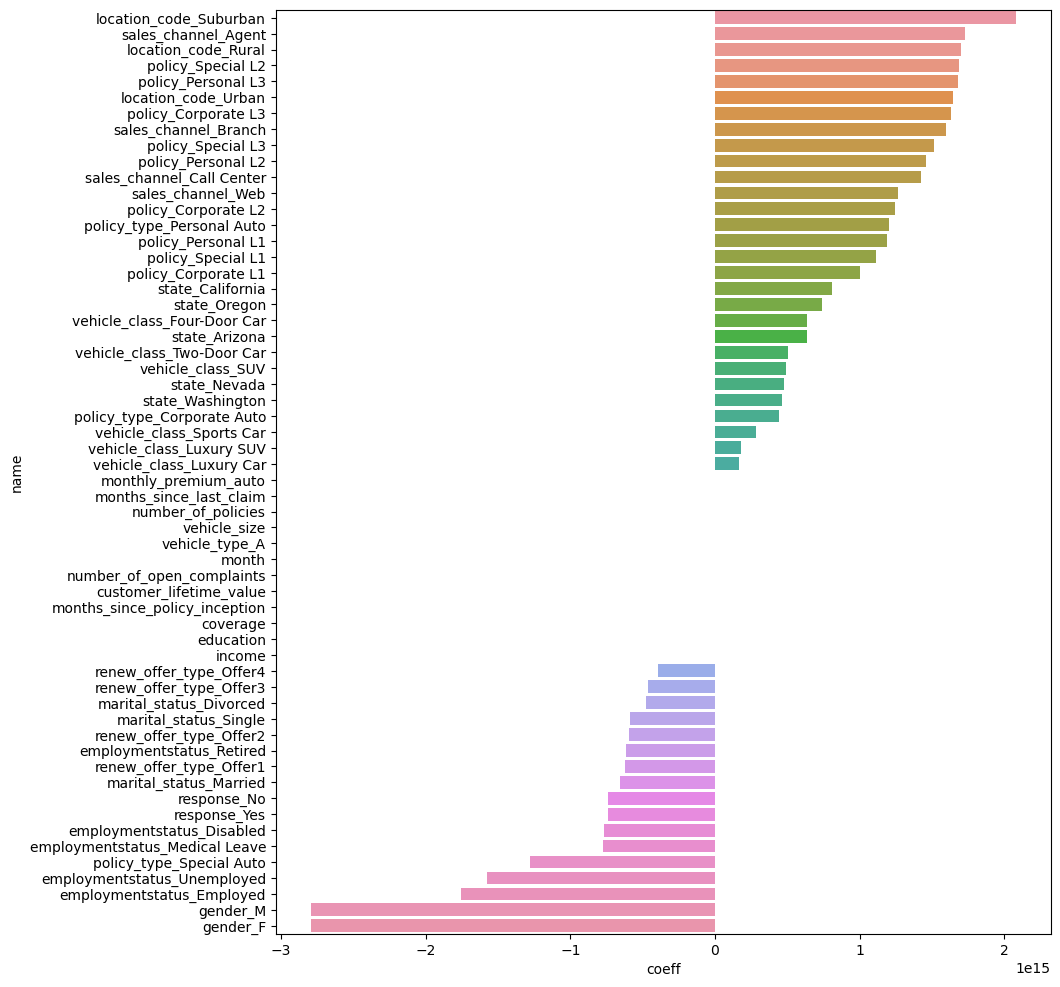

In [147]:
import seaborn as sns
fi_df_sorted = fi_df.sort_values(by = "coeff", ascending = False)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.barplot(y = fi_df_sorted["name"], x = fi_df_sorted["coeff"])

### Lasso

In [1]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=0)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

NameError: name 'X_train' is not defined